In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

In [3]:
# import imgaug as ia
# from imgaug import augmenters as iaa

In [1]:
import pandas as pd
import os
from datetime import datetime
import time
from pprint import pprint

In [5]:
# attention
am_I_using_colab = False

In [6]:
# if am_I_using_colab:
#     !pip install -U tensorflow-addons
    
# import tensorflow_addons as tfa
# import tqdm

In [7]:
# plt.ioff()  # interactive mode off
# plt.ion()  # interactive mode on

# %pylab inline

np.random.seed(1728)
# ia.random.seed(1728)

In [8]:
if am_I_using_colab:
    ###
    from google.colab import drive
    drive.mount('/content/drive')

    print(os.getcwd())
    print(os.listdir())

    ###
    temp_dir = '/content/temp'
    try:
        os.mkdir(temp_dir)
    except:
        pass
    print(os.listdir(temp_dir))

    ###
    dataset_filepath = f'{temp_dir:s}/dataset_v1.7z'
    import gdown
    gdown.download(
        r'https://drive.google.com/uc?id=15kAUrJvaJy54xoXIwPZqtkBQGccjOR5k',
        output=dataset_filepath,
        quiet=False,
        )

    ###
    !pip install py7zr
    import py7zr
    with py7zr.SevenZipFile(dataset_filepath, 'r') as archive:
        archive.extractall(path="./dataset_v1")

    ###


In [9]:
import time

def mulai_hitung_waktu():
    global waktu_mulai
    waktu_mulai = time.time()

def cetak_lama_waktu():
    global waktu_mulai
    hasil_detik = abs(waktu_mulai - time.time())
    hasil_milidetik = hasil_detik * 1000
    
    menit = hasil_detik / 60
    detik = hasil_detik % 60
    
    menit_detik = str(int(menit)) + 'm' + ':' + str(int(detik)) + 's'
    
    print('-----\n(%.2f ms) == (%s)\n-----' % (hasil_milidetik, menit_detik))
    del waktu_mulai


# cara pakai
# ----------
mulai_hitung_waktu()  ###

time.sleep(100/1000)  # time-consuming computing here

cetak_lama_waktu()  ###

-----
(103.01 ms) == (0m:0s)
-----


In [10]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print("Num GPUs Available: %d Physical GPUs, %d Logical GPU" % (len(gpus), len(logical_gpus)))
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

Num GPUs Available: 1 Physical GPUs, 1 Logical GPU


In [11]:
if am_I_using_colab:
    WORK_DIR = '/content'
    TRAIN_SET_PATH = f'{WORK_DIR}/dataset_v1'
    # TEST_SET_PATH = f''

    DRIVE_DIR = '/content/drive/MyDrive/MyNotebook/MySkripsi'
    CHECKPOINTS_DIR = f'{WORK_DIR}/checkpoints'
    FINAL_EPOCH_DIR = f'{WORK_DIR}/weights and models'

else:
    WORK_DIR = r'D:\MaskTheFace\datasets\_temp'
    TRAIN_SET_PATH = r'D:\MaskTheFace\datasets\_temp\_v1'
    TEST_SET_PATH = r'D:\MaskTheFace\datasets\_temp\_v1 - test only'

    CHECKPOINTS_DIR = r'D:\MaskTheFace\datasets\_temp\checkpoints'
    FINAL_EPOCH_DIR = r'D:\MaskTheFace\datasets\_temp\weights and models'

directories = [
    CHECKPOINTS_DIR,
    FINAL_EPOCH_DIR
]

for dir in directories:
    print(dir)
    try:
        os.mkdir(dir)
        print('success')
    except FileExistsError:
        print('exist')
    except:
        print('error')

# Set working directory
os.chdir(WORK_DIR)

print('current work dir:')
print(os.getcwd())
print()
print('listdir WORK_DIR:')
pprint(os.listdir('./'))

D:\MaskTheFace\datasets\_temp\checkpoints
exist
D:\MaskTheFace\datasets\_temp\weights and models
exist
current work dir:
D:\MaskTheFace\datasets\_temp

listdir WORK_DIR:
['Augmented Images - Masked',
 'Augmented Images - Masked.zip',
 'Augmented Images - Unmasked',
 'Augmented Images - Unmasked.zip',
 'checkpoints',
 'main, train set - crop masked resized',
 'main, train set - crop masked resized.zip',
 'main, train set - crop resized',
 'main, train set - crop resized.zip',
 'Model tracking and summary.xlsx',
 'note.txt',
 'thumbnails - augmented masked.zip',
 'thumbnails - augmented unmasked.zip',
 'verbose.mobilenetv2_1.00_128-imagenet128-32-12.txt',
 'verbose.mobilenetv2_1.00_32-64-12.txt',
 'verbose.mobilenetv2_1.00_96-16-fc12.txt',
 'verbose.mobilenetv2_1.00_96-imagenet96-64-12.txt',
 'weights and models',
 '_v1',
 '_v1 - test only',
 '_v1.7z',
 '_verbose.mobilenetv2_1.00_128-32-12.txt',
 '_verbose.mobilenetv2_1.00_128-32-fc12.txt',
 '_verbose.mobilenetv2_1.00_128-64-12.txt',
 '_

In [12]:
names = os.listdir(TRAIN_SET_PATH)

length_dict = {}
for name in names:
    samples = f'{TRAIN_SET_PATH:s}/{name:s}'
    length_dict[name] = len(os.listdir(samples))

n_min = min(length_dict.values())
n_max = max(length_dict.values())
n_sum = sum(length_dict.values())

print(f'{len(names):d} names')
display(length_dict)
print(f"max: {n_min:d}")
print(f"min: {n_max:d}")
print(f"total: {n_sum:d}")

# del n_min, n_max, n_sum, length_dict

12 names


{'Andhika': 1260,
 'Ardiyan': 1260,
 'Artik': 1260,
 'Ballya': 1260,
 'Bina': 1260,
 'Buyung': 1260,
 'Kresna': 1260,
 'Mhartian': 1260,
 'RaihanA': 1260,
 'Syifa': 1260,
 'Taufik': 1260,
 'Yandi': 1260}

max: 1260
min: 1260
total: 15120


In [13]:
validation_split = 0.4
total_train = round(n_sum * (1 - validation_split))
total_val = n_sum - total_train

print(f'train images: {total_train:d}')
print(f'validation images: {total_val:d}')

train images: 9072
validation images: 6048


In [14]:
batch_size = 64
epochs = 50
IMG_HEIGHT = 64
IMG_WIDTH = 64

# model creation kwargs
weights = None  # ['imagenet', None]
dense = False         # [True, False]

In [15]:
image_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=1.05,
    height_shift_range=1.05,
    brightness_range=(0.75, 1.25),
    shear_range = 0.075,
    zoom_range=0.2,
    fill_mode = 'nearest',
    horizontal_flip=True,
    # vertical_flip=True,
    validation_split=validation_split,
    # preprocessing_function=seq.augment_image
    )

In [16]:
train_data_gen = image_generator.flow_from_directory(
    seed=1728,
    subset='training',
    batch_size=batch_size,
    directory=TRAIN_SET_PATH,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    interpolation='bicubic',
    class_mode='categorical')

val_data_gen = image_generator.flow_from_directory(
    seed=1728,
    subset='validation',
    batch_size=batch_size,
    directory=TRAIN_SET_PATH,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    interpolation='bicubic',
    class_mode='categorical')

Found 9072 images belonging to 12 classes.
Found 6048 images belonging to 12 classes.


In [17]:
def show_images(num_col, sample_images, num_row=4, showfig=True):
    num_row = round(len(sample_images)/num_col)
    num = len(sample_images)
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 1.65*num_row))

    # plot images
    for i in range(num_col*num_row):
        ax = axes[i//num_col, i%num_col]
        ax.axis('off')
        try:
            ax.imshow(sample_images[i])
        except IndexError:
            continue
    
    if showfig:
        plt.show(fig)
    plt.close(fig)
        
    # return fig

In [18]:
sample_training_images, class_training_images = next(train_data_gen)

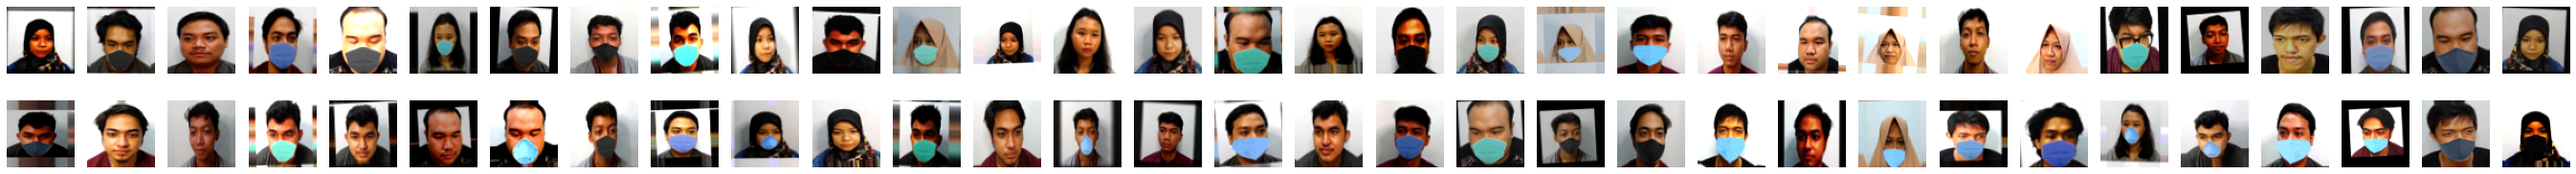

-----
(2126.16 ms) == (0m:2s)
-----


In [19]:
mulai_hitung_waktu()  ###

show_images(batch_size//2, sample_training_images)

cetak_lama_waktu()  ###

In [20]:
def new_model(weights=None, dense=False):
    global IMG_HEIGHT, IMG_WIDTH, batch_size
    base_model = keras.applications.MobileNetV2(
        weights=weights,  # Load weights pre-trained on ImageNet.
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),  # recommended  because trained in (224, 224, 3) ImageNet
        alpha=1.0,  # network width multiplier, default 1.0 in the MobileNetV2 paper
        include_top=False)  # Do not include the ImageNet classifier at the top.

    if weights == 'imagenet':
        base_model.trainable = False  # freeze the base model.
    else:
        base_model.trainable = True

    # Create a new model on top.
    inputs = keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

    # We make sure that the base_model is running in inference mode here,
    # by passing `training=False`.
    # This is important for fine-tuning, as you will learn in a few paragraphs.

    if weights == 'imagenet':
        x = base_model(inputs, training=False)  # freeze the base model.
    else:
        x = base_model(inputs, training=True)

    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)

    if bool(dense) == True:
        # Regularize with dropout
        x = keras.layers.Dropout(0.1)(x)
        x = keras.layers.Dense(256,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
        x = keras.layers.Dropout(0.1)(x)
        x = keras.layers.Dense(256,activation='relu')(x) #dense layer 2
        x = keras.layers.Dropout(0.1)(x)
        x = keras.layers.Dense(128,activation='relu')(x) #dense layer 3
        x = keras.layers.Dropout(0.05)(x)

    else:
        # Regularize with dropout
        x = keras.layers.Dropout(0.2)(x)

    # A Dense classifier with a single unit (binary classification)
    outputs = keras.layers.Dense(12, activation="softmax")(x)

    if weights == 'imagenet':
        if IMG_HEIGHT in [96, 128, 192, 224]:
            name = f'mobilenetv2_1.00_{IMG_HEIGHT:d}-imagenet{IMG_HEIGHT:d}-{batch_size:d}'
        else:
            name = f'mobilenetv2_1.00_{IMG_HEIGHT:d}-imagenet224-{batch_size:d}'
    else:
        name = f'mobilenetv2_1.00_{IMG_HEIGHT:d}-{batch_size:d}'

    if bool(dense) == True:
        name = f'{name:s}-fc12'
    else:
        name = f'{name:s}-12'

    model = keras.Model(inputs=inputs, outputs=outputs, name=name)
    print(model.name)
    return model

In [21]:
# model = new_model(weights=weights, dense=dense)

mobilenetv2_1.00_64-64-12


In [22]:
# Optimizer's scheduler: ExponentialDecay

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

In [23]:
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
loss_fn = 'categorical_crossentropy'
metrics=[
    'categorical_accuracy',
    keras.metrics.TopKCategoricalAccuracy(k=3, name='top-3'),
    keras.metrics.AUC(name='ROC-AUC', curve='ROC'),
    keras.metrics.AUC(name='PR-AUC', curve='PR'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.TruePositives(name='TP'),
    keras.metrics.TrueNegatives(name='TN'),
    keras.metrics.FalsePositives(name='FP'),
    keras.metrics.FalseNegatives(name='FN'),]

# model.compile(
#     optimizer=optimizer,
#     loss=loss_fn,
#     metrics=metrics)

In [24]:
model.summary()

Model: "mobilenetv2_1.00_64-64-12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
mobilenetv2_1.00_64 (Functio (None, 2, 2, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                15372     
Total params: 2,273,356
Trainable params: 2,239,244
Non-trainable params: 34,112
_________________________________________________________________


In [25]:
params = {
    'total_train' : total_train,
    'total_val' : total_val,
    'batch_size' : batch_size,
    'steps_per_epoch' : total_train//batch_size,
    'validation_steps' : total_val//batch_size,
    'epochs' : epochs}

display(params)

{'total_train': 9072,
 'total_val': 6048,
 'batch_size': 64,
 'steps_per_epoch': 141,
 'validation_steps': 94,
 'epochs': 50}

In [26]:
# dir1 = f'{CHECKPOINTS_DIR}/{model.name}'
# dir2 = f'{FINAL_EPOCH_DIR}/{model.name}'

# for dir in [dir1, dir2]:
#     print(dir)
#     try:
#         os.mkdir(dir)
#         print('success')
#     except FileExistsError:
#         print('!!! exist')
#     except:
#         print('~~~ error')
#     print()


D:\MaskTheFace\datasets\_temp\checkpoints/mobilenetv2_1.00_64-64-12
success

D:\MaskTheFace\datasets\_temp\weights and models/mobilenetv2_1.00_64-64-12
success



In [27]:
if am_I_using_colab:
    epoch5_filepath = '%s/%s/%s.weights.{epoch:03d}.hdf5' % (CHECKPOINTS_DIR, model.name, model.name)
    monitor_filepath = '%s/%s/%s.weights.{epoch:03d}_{val_categorical_accuracy:.4f}_{val_loss:.4f}.hdf5' % (CHECKPOINTS_DIR, model.name, model.name)
    tensorboard_dir = '%s/%s/%s.tensorboard' % (CHECKPOINTS_DIR, model.name, model.name)
else:
    epoch5_filepath = '%s/%s/%s.weights.{epoch:03d}.hdf5' % (CHECKPOINTS_DIR, model.name, model.name)
    monitor_filepath = '%s/%s/%s.weights.{epoch:03d}_{val_categorical_accuracy:.4f}_{val_loss:.4f}.hdf5' % (CHECKPOINTS_DIR, model.name, model.name)
    tensorboard_dir = '%s/%s/%s.tensorboard' % (CHECKPOINTS_DIR, model.name, model.name)
    
# Model's callback: ModelCheckpoint
epoch_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=epoch5_filepath,
    monitor='val_loss',
    save_weights_only=True,
    save_freq=int(5 * params['steps_per_epoch'])
    )

acc_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=monitor_filepath,
    monitor='val_categorical_accuracy',
    # verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=True,
    save_freq='epoch'
    )

loss_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=monitor_filepath,
    monitor='val_loss',
    # verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=True,
    save_freq='epoch'
    )

# initialize tqdm callback with default parameters
# tqdm_callback = tfa.callbacks.TQDMProgressBar(
#     metrics_separator=', '
#     )

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=tensorboard_dir,
    write_graph=True,
    write_images=True
    )

callbacks = [
    epoch_checkpoint,
    acc_checkpoint,
    loss_checkpoint,
    # tqdm_callback,
    tensorboard_callback
    ]

In [28]:
if am_I_using_colab:
    verbosity = 2
else:
    verbosity = 1

In [28]:
# print(model.name)
# mulai_hitung_waktu()  ###

# training_history = model.fit(
#     train_data_gen,
#     shuffle=True,
#     verbose=verbosity,  # 0 nope, 1 realtime, 2 epoch end
#     steps_per_epoch=total_train // batch_size,
#     epochs=epochs,
#     validation_data=val_data_gen,
#     validation_steps=total_val // batch_size,
#     callbacks=callbacks,
#     workers=0
#     )

# cetak_lama_waktu()  ###

mobilenetv2_1.00_64-64-12
Epoch 1/50


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "X:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-e3fde1a57ace>", line 4, in <module>
    training_history = model.fit(
  File "X:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 108, in _method_wrapper
    return method(self, *args, **kwargs)
  File "X:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1098, in fit
    tmp_logs = train_function(iterator)
  File "X:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 780, in __call__
    result = self._call(*args, **kwds)
  File "X:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 840, in _call
    return self._stateless_fn(*args, **kwds)
  File "X:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\eager\

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "X:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-e3fde1a57ace>", line 4, in <module>
    training_history = model.fit(
  File "X:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 108, in _method_wrapper
    return method(self, *args, **kwargs)
  File "X:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1098, in fit
    tmp_logs = train_function(iterator)
  File "X:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 780, in __call__
    result = self._call(*args, **kwds)
  File "X:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 840, in _call
    return self._stateless_fn(*args, **kwds)
  File "X:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\eager\

TypeError: object of type 'NoneType' has no len()

In [ ]:
# import pandas as pd

# history_df = pd.DataFrame(training_history.history)

# history_savepath = f'{FINAL_EPOCH_DIR}/{model.name}/history.{model.name}.csv'
# weights_savepath = f'{FINAL_EPOCH_DIR}/{model.name}/weights.{model.name}.h5'
# model_savepath = f'{FINAL_EPOCH_DIR}/{model.name}/model.{model.name}.h5'
    

# # save to csv: 
# with open(history_savepath, mode='w') as f:
#     history_df.to_csv(
#         f,
#         header=True,
#         index=False
#         )
    
# model.save_weights(
#     filepath=weights_savepath,
#     overwrite=True,
#     save_format='h5'
#     )

# model.save(
#     filepath=model_savepath,
#     overwrite=True,
#     include_optimizer=True,
#     save_format='h5'
#     )

In [ ]:
_checkpoints_listdir = os.listdir(f'{CHECKPOINTS_DIR}/{model.name}')
print(len(_checkpoints_listdir))
pprint(_checkpoints_listdir)

In [ ]:
_final_epoch_listdir = os.listdir(f'{FINAL_EPOCH_DIR}/{model.name}')
print(len(_final_epoch_listdir))
pprint(_final_epoch_listdir)

In [ ]:
if am_I_using_colab:
    !cp -fRv "/content/checkpoints" "/content/drive/MyDrive/MyNotebook/MySkripsi"
    print()
    !cp -fRv "/content/weights and models" "/content/drive/MyDrive/MyNotebook/MySkripsi"
    print()
    print('copy success')
else:
    pass

In [ ]:
if _checkpoints_listdir and _final_epoch_listdir:
    print('all process done, please recheck before terminating runtime session')
else:
    print('WARNING : some files failed to save')
print()
print('''don't forget to save the model.fit() verbose output''')